In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
comp = pd.read_csv(r'Company_Data.csv')
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
comp['Sales'].mean()

7.496325000000001

In [4]:
# to convert continuous variables into categorical variable use for loop, sales<=7.49 = Low, sales>7.49 = High

sales_val=[]

for i in comp['Sales']:
    if i<=7.49:
        sales_val.append('Low')
    else:
        sales_val.append('High')
        
comp['sales_val']= sales_val  

In [5]:
comp.sales_val

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: sales_val, Length: 400, dtype: object

In [6]:
comp.drop(columns='Sales', inplace=True)

In [7]:
comp.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [8]:
comp[comp.duplicated()] # No duplicates

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val


In [9]:
#sns.pairplot(data=comp, hue='sales_val')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [11]:
le = LabelEncoder()

In [12]:
comp['US'] =comp['US'].apply(lambda x : 1 if x=='Yes' else 0)
comp['ShelveLoc'] = comp['ShelveLoc'].map({'Medium':1, 'Bad':2, 'Good':0})
comp['Urban'] = comp['Urban'].apply(lambda x : 1 if x=='Yes' else 0)

In [13]:
comp['sales_val'] = le.fit_transform(comp['sales_val'])

In [14]:
comp.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,2,42,17,1,1,0
1,111,48,16,260,83,0,65,10,1,1,0
2,113,35,10,269,80,1,59,12,1,1,0
3,117,100,4,466,97,1,55,14,1,1,1
4,141,64,3,340,128,2,38,13,1,0,1


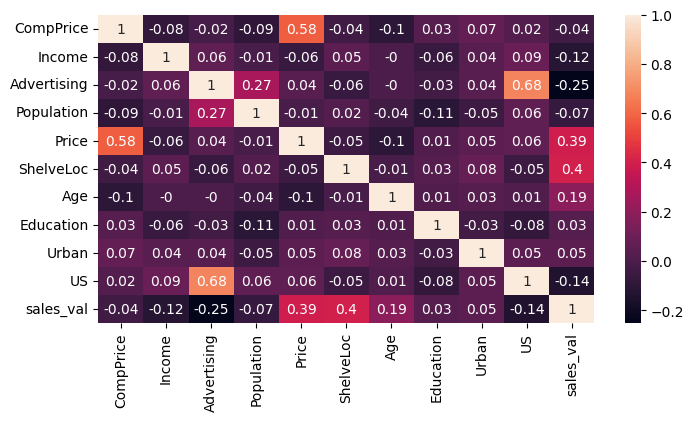

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(np.round(comp.corr(),2),annot=True)
plt.show()

In [16]:
# splitting the data

x= comp.iloc[:,:-1]
y=comp.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20, random_state=40)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [20]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

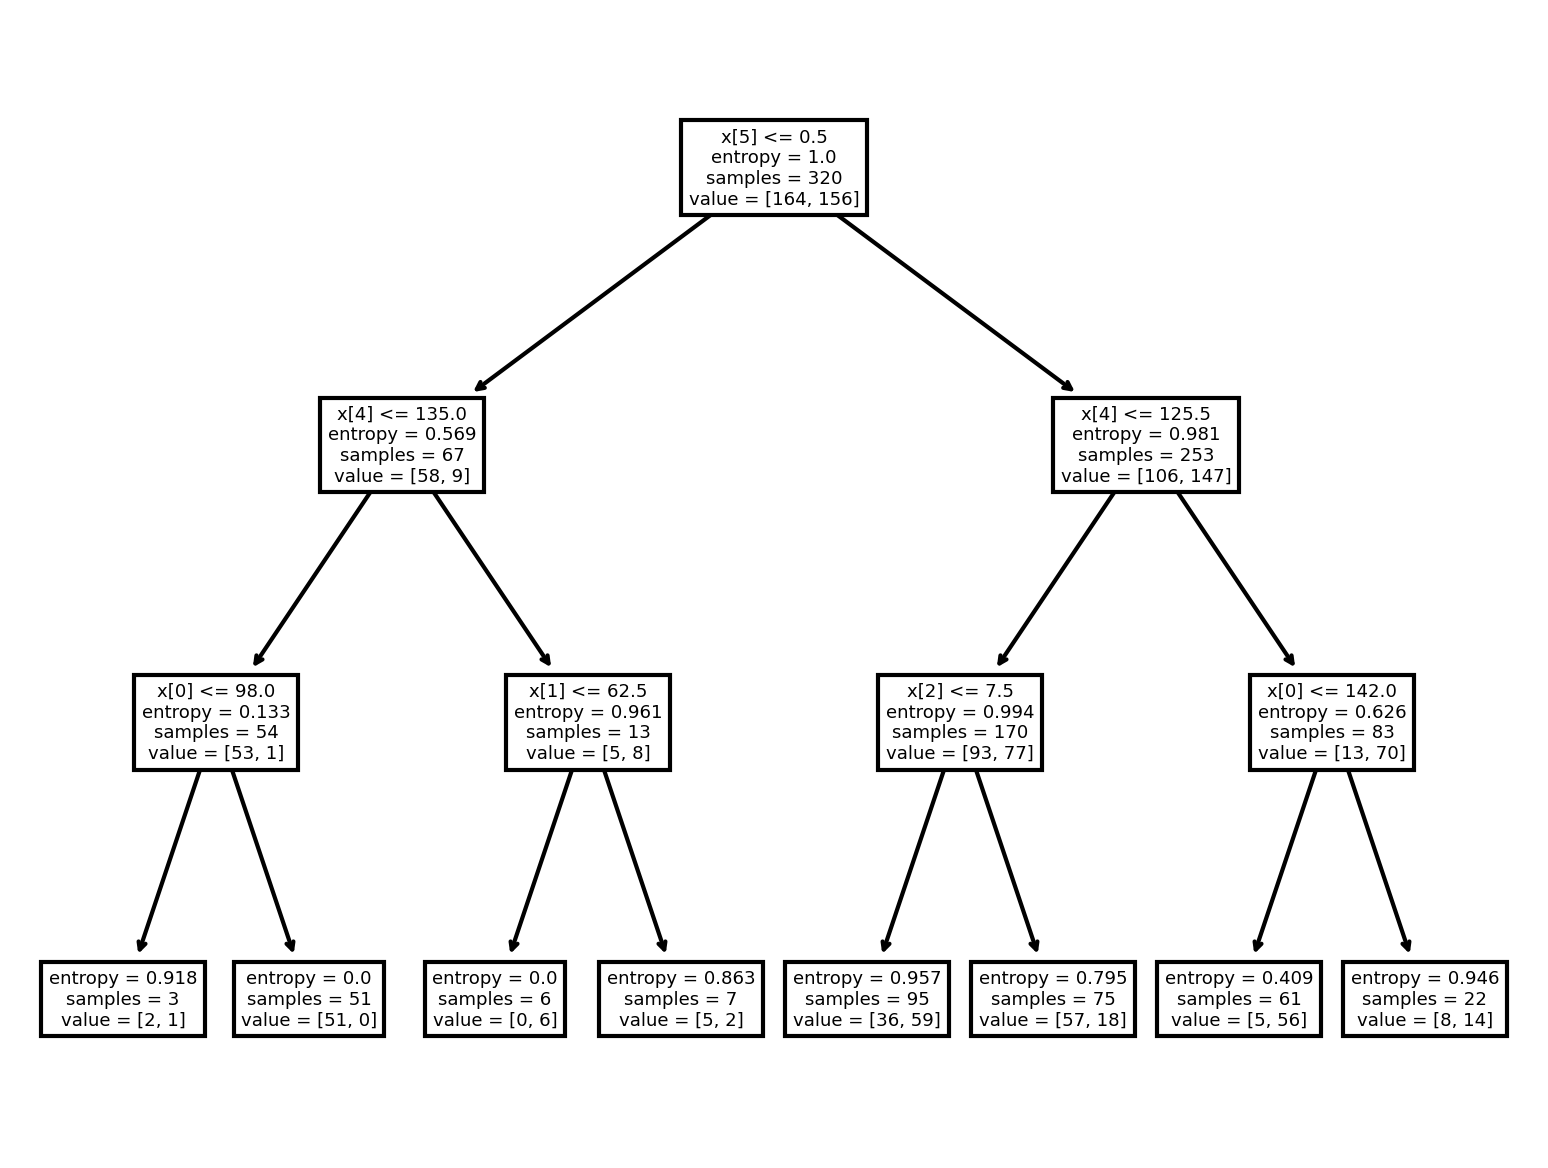

In [21]:
plt.figure(dpi=300)
tree.plot_tree(model)
plt.show()

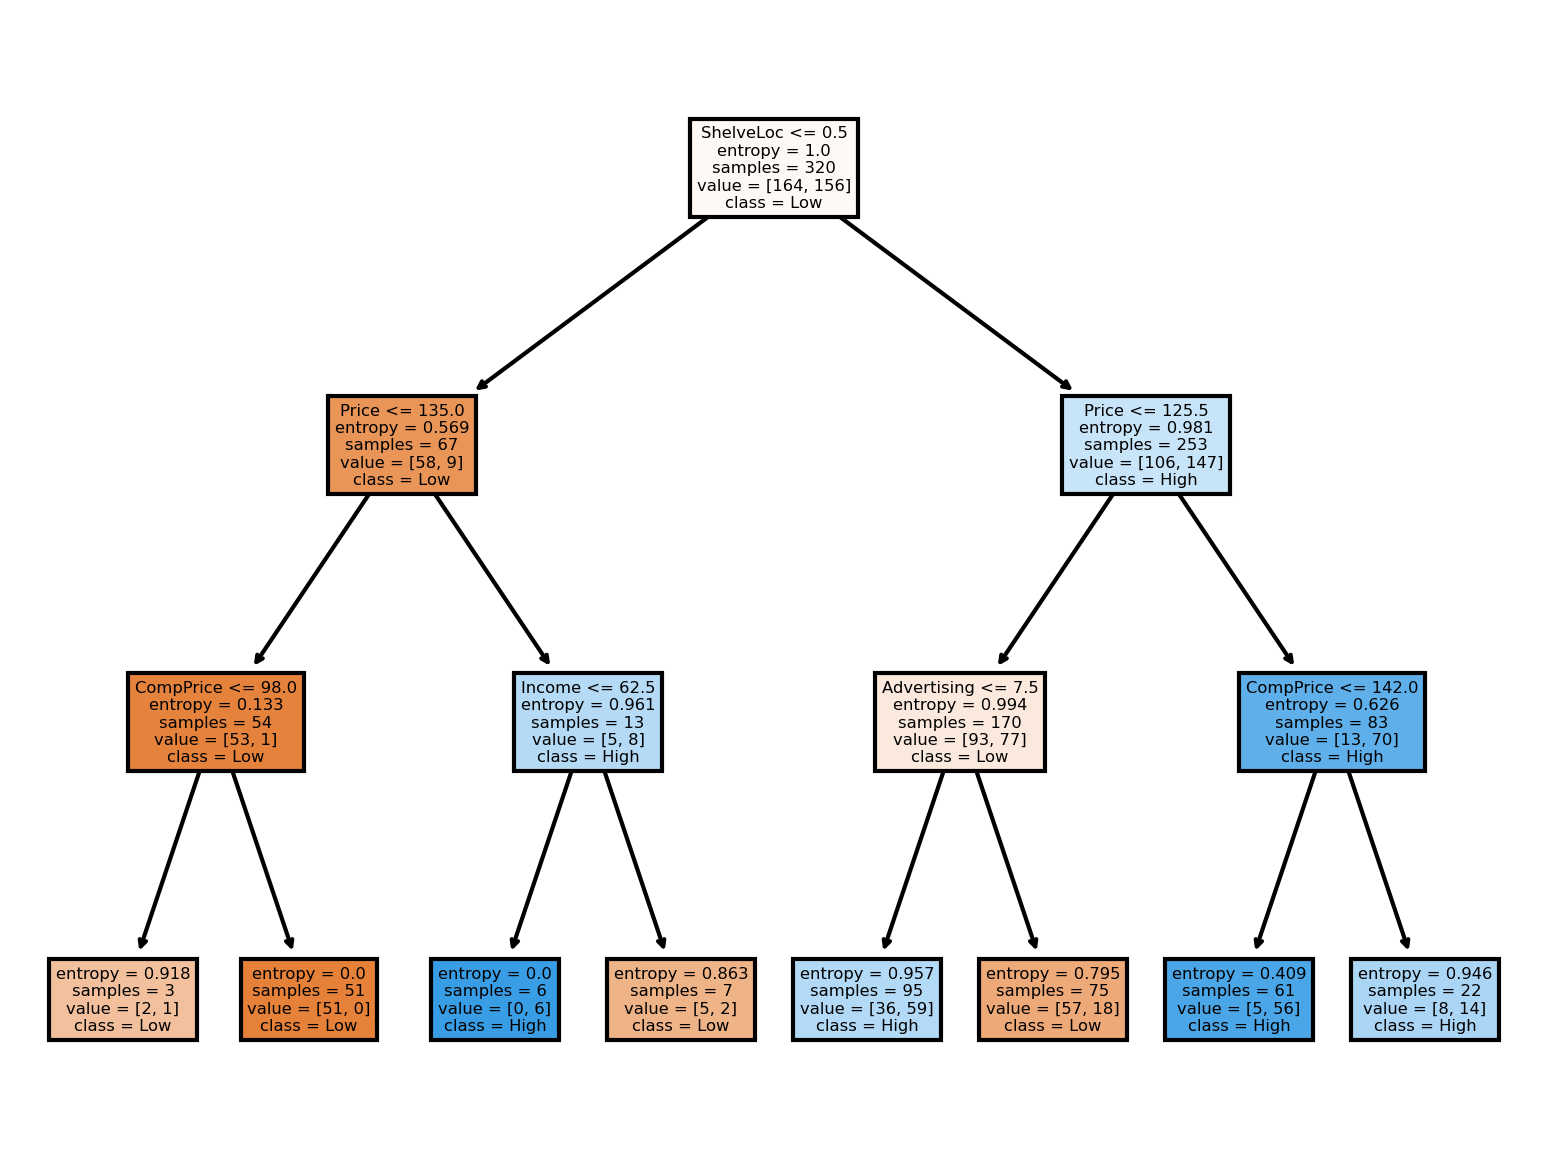

In [22]:
plt.figure(dpi=300)
fn= x.columns
cn= ['Low', 'High'] 
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [23]:
pd.Series(pred).value_counts()

1    51
0    29
dtype: int64

In [24]:
pd.crosstab(ytest, pred)

col_0,0,1
sales_val,,
0,20,15
1,9,36


In [25]:
# Accuracy

from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
np.mean(pred == ytest), accuracy_score(ytest, pred)

(0.7, 0.7)

# Decision Tree 

In [27]:
gini_model = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
gini_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [28]:
ypred = gini_model.predict(xtest)

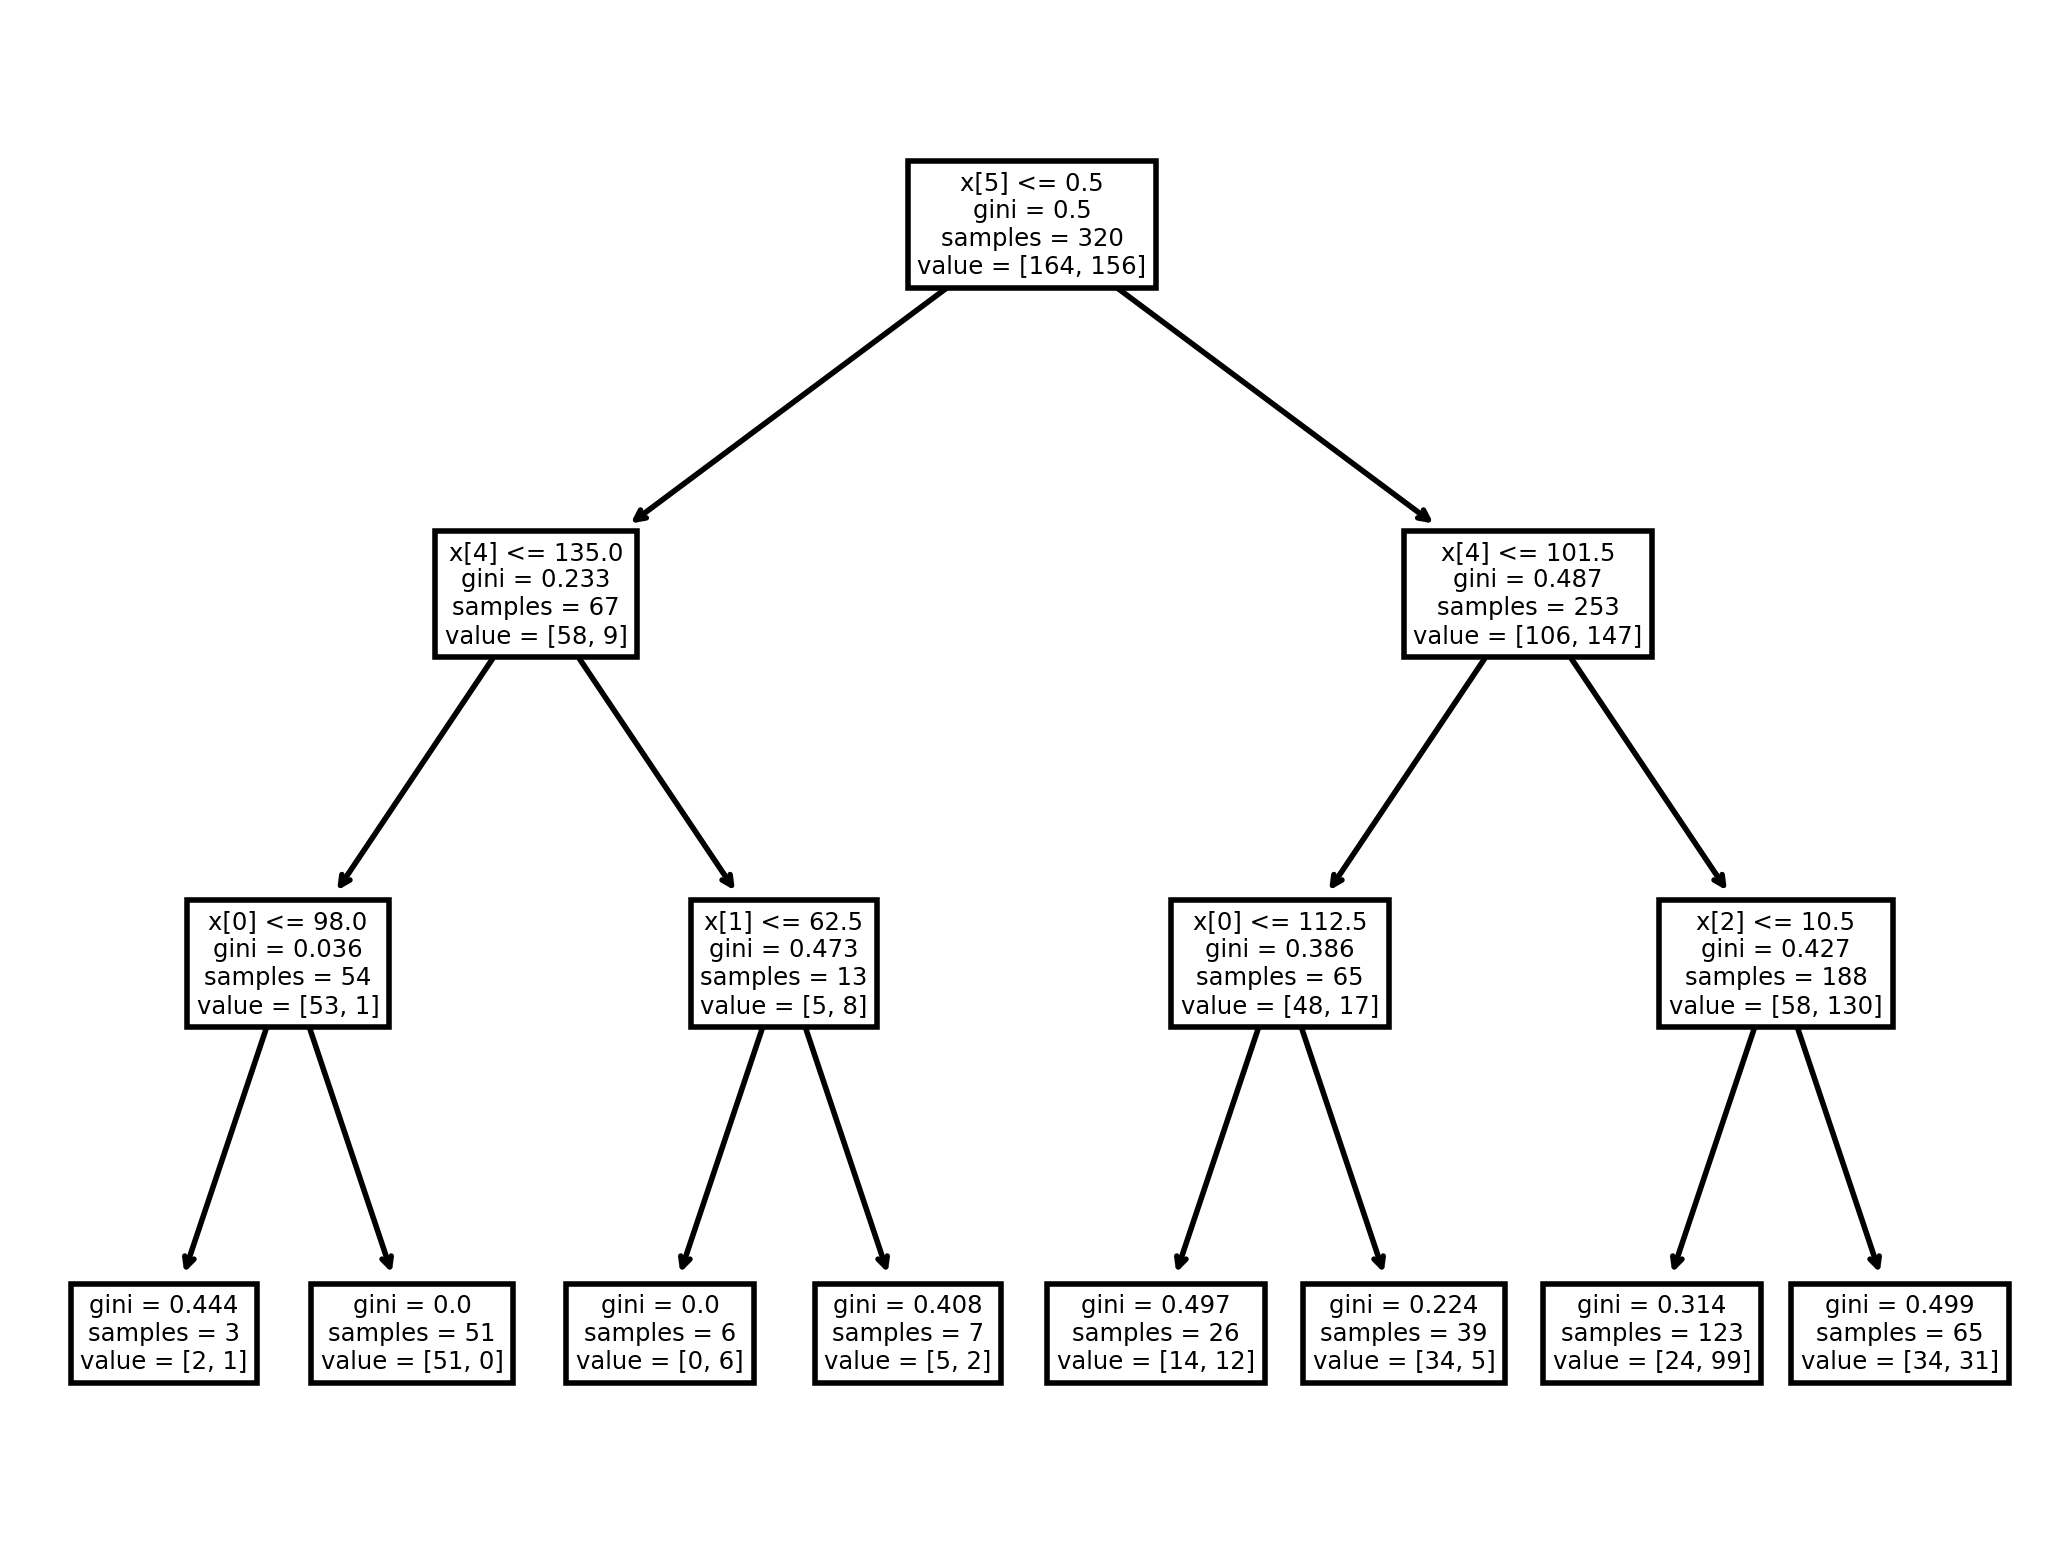

In [29]:
plt.figure(dpi=400)
tree.plot_tree(gini_model)
plt.show()

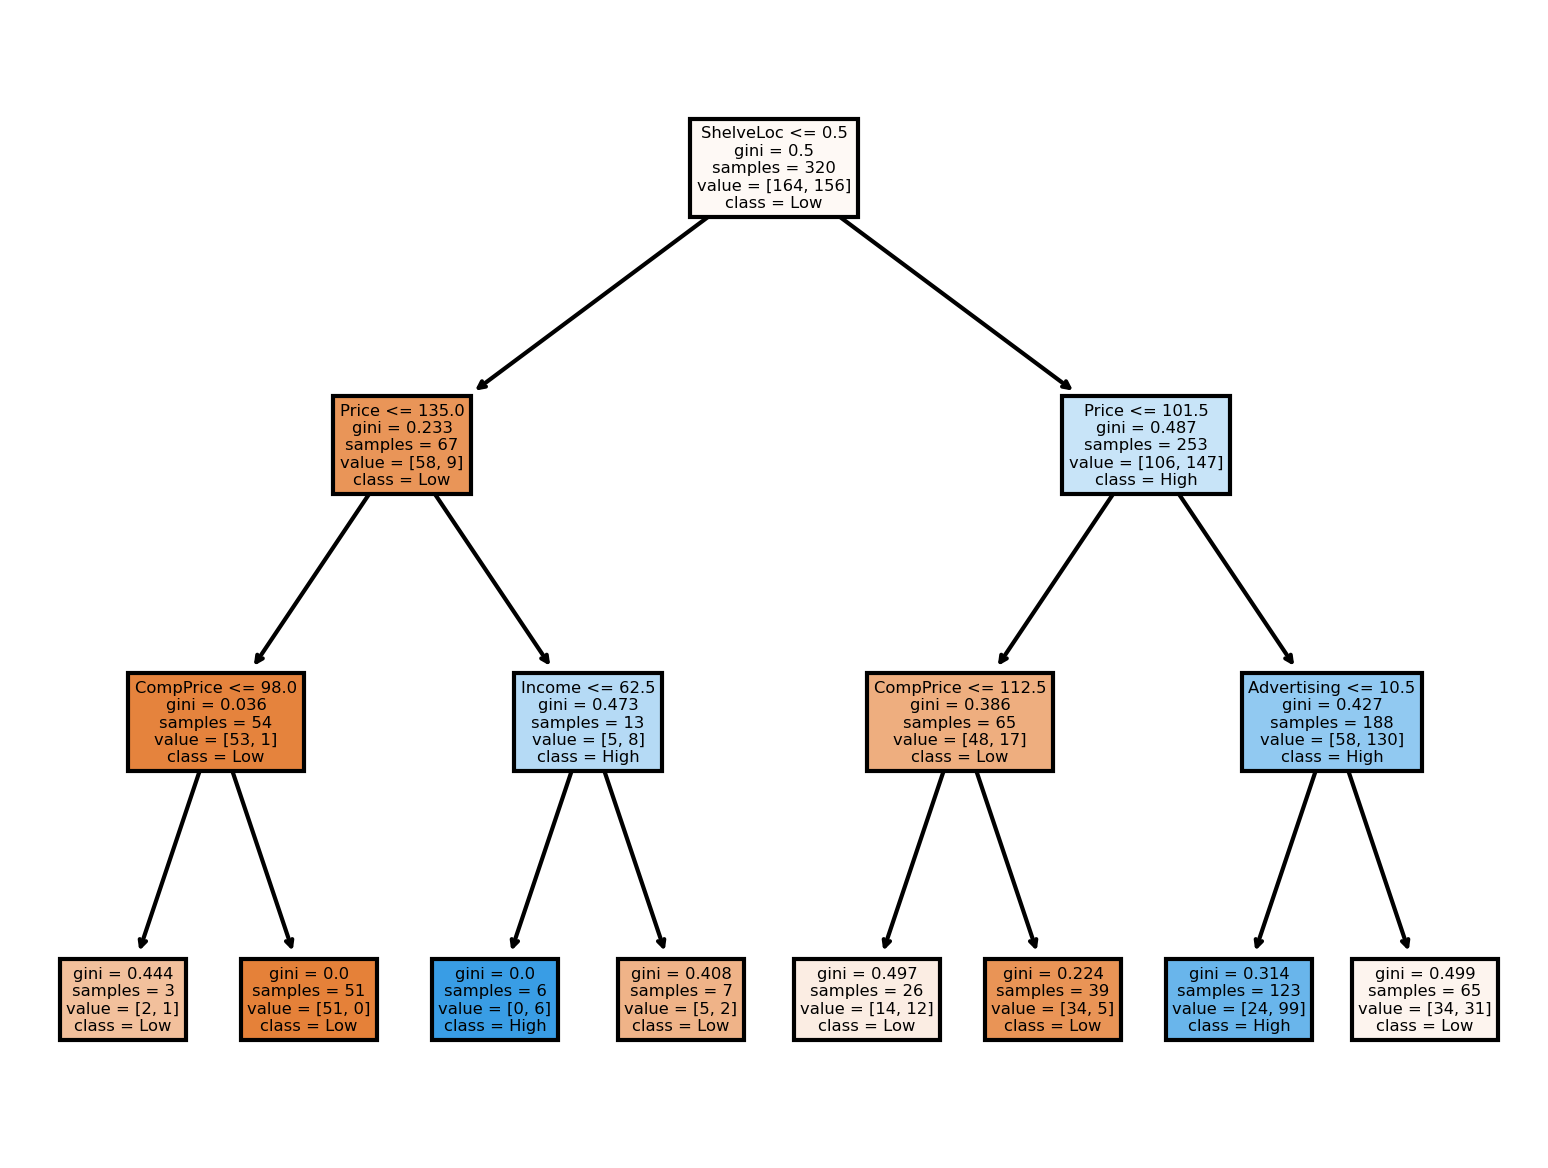

In [30]:
plt.figure(dpi=300)
fn= x.columns
cn= ['Low', 'High'] 
tree.plot_tree(gini_model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [31]:
np.mean(ypred == ytest)

0.675

In [32]:
print(confusion_matrix(ytest, ypred))

[[29  6]
 [20 25]]


In [34]:
((29+25)/(29+6+20+25))

0.675